<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/leobergman/LeoBergman_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integration**
**Leo Bergman**

# **Abstract**

In this lab I performed some experiments with numerical differential equations solvers. The stability and accuracy of the methods was tested for the methods.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [69]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Leo Bergman (bergmanleo@gmail.com)
# Template by Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [70]:
# Load neccessary modules.
from google.colab import files
from scipy.sparse import random
import time
import timeit
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import tri, axes
import mpl_toolkits
from scipy.interpolate import lagrange
import scipy.optimize as opt
import numpy as np
from numpy.linalg import inv,norm,solve,lstsq,det
import unittest
from functools import reduce
from numpy.polynomial import polynomial as Poly
import pandas as pd


# **Introduction**

# **Method**

**Scalar problem**
To solve the problem 

$\frac{du}{dt} = f(u,t)$

$u(0) = u_0$

I will use the implicit euler method and the Runge kutta2 (Heuns method). For the implicit Euler we have:

$U(t_n) \approx u(t_{n-1}) + k_n u'(t_n) = u_(t_{n-1}) + k_n f(u(t_n),t_n)$

With update formalism 

$U_n = U_{n-1} + k_n f(U_n,t_n)$

$x = U_{n-1} + k_n f(x^k,t_n)$

The problem has the exact solution

$du/dt = \gamma u(t) \Leftrightarrow \frac{du/dt}{u(t)} = \gamma  $

integrating on both sides

$\int \frac{du/dt}{u(t)}dt = \int \gamma dt$

$\ln(u) = \gamma t + c$

$u(t) = e^c e^{\gamma t}$

$ u(t) = u_0e^{\gamma t}$

I set $\gamma = -5, u_0 = 12$

 (I just picked two arbitrary numbers that yields stable solutions $\gamma<0$)

with equlibrium at $u^* = 0$


 **System of IVP's**

I solve the SIR-model as well as the Volterra-Lotka from the lecture notes

*SIR*

$\begin{bmatrix}
\dot{u}_1 \\
\dot{u}_2 \\
\dot{u}_3
\end{bmatrix}

= \begin{bmatrix}
\dot{S}_1 \\
\dot{I}_2 \\
\dot{R}_3
\end{bmatrix}
= \begin{bmatrix}
\frac{- \beta I S}{N} \\
(R_0 \frac{S}{N}-1)\gamma I\\
\gamma I
\end{bmatrix}$

with initial parameters $N = 100,S = 99, I = 1, R= 0, 
t = 30 days, k = 1, \beta = 0.6, \gamma = 1/12$


For the Volterra system we have that

$\begin{bmatrix}
\dot{u}_1 \\
\dot{u}_2
\end{bmatrix}
= \begin{bmatrix}
u_1(t)(\alpha-\beta u_2(t)) \\
u_2(t)(\delta u_1(t)-\gamma)
\end{bmatrix}$

with $\alpha = 1, \beta = 1, \gamma = 2, \delta = 1.5$

and $u_0 = (1.1, 0.5)$

$u_1$ prey
$u_2$ predator



For the Runge kutta (Heuns) I used the update formalism from the lecture notes

$t_n = t_{n-1}+h$

$u_{n} = u_{n-1} + \frac{h}{2}(f(t_{n-1},u_{n-1} + h f(t_{n-1},u_{n-1})))$

In [71]:

def rungeKuttaScalar(f,u_0,t_0,T,h):
  t = t_0
  N = int((T-t_0)/h)+1
  time = np.linspace(t_0, T, num=N)
  u = u_0
  for i in range(1,N-1):
    step = u[i-1] + h*f(u[i-1], h*(i-1))
    u[i] = u[i-1] + h*( (1/2)*f(u[i-1], h*(i-1)) + (1/2)*f(step, h*i))
  return time,u

def implicitEuler(f,u_0,t_0,T,h):
  N = int((T-t_0)/h)+1
  time = np.linspace(t_0, T, num=N)
  u = u_0
  for i in range(1,N-1):
    t = time[i]
    u[i+1] = scipy.optimize.newton(lambda u1: u1 - u[i] - h*f(u1, t), u[i])
  return time,u

def imlicitEulerSystem(f,u_0,t_0,T,h):
  time = np.linspace(t_0, T, num=int((T-t_0)/k+1))
  u = np.zeros(u_0.shape)
  for i in range(1,len(time)):
    t = time[i]
    u[:, i] = opt.newton(lambda u: u - u_0[:, i] - h*f(u, t), u_0[:,i])
  return time,u

def rungeKuttaSystem(f, u, t_0, T, h):
  N = int((T-t_0)/h)+1
  time = np.linspace(t_0, T, num=N)
  for i in range(1,N):
    hbar = h*f(u[:,i-1], h*(i-1))
    u[:,i] = u[:,i-1] + h*( (1/2)*f(u[:,i-1], h*(i-1)) + (1/2)*f(u[:,i-1]+hbar, h*i))
  return time, u



# **Results**

**Proof of correctness**

.

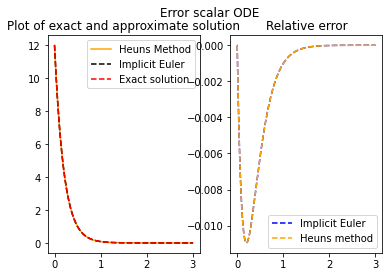

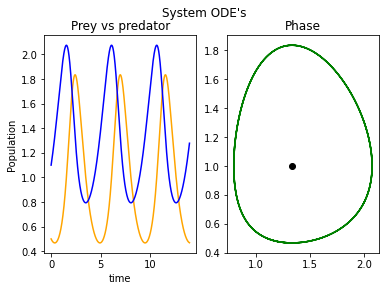

.

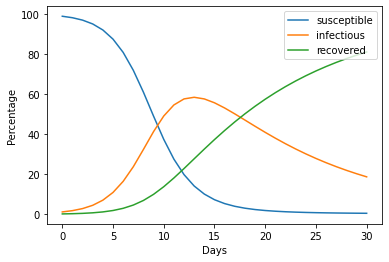

.
----------------------------------------------------------------------
Ran 3 tests in 1.072s

OK


In [72]:

class Test(unittest.TestCase):

  def function_gen(self,gamma):
    def f(u,t):
      return gamma*u
    return f

  def testEulerScalar(self):
    u0 = 12
    gamma = -5
    lastT = 3
    h = 1e-3
    t_0 = 0
    f = self.function_gen(gamma)
    u_0 = np.zeros(int((lastT-t_0)/h+1))
    u_0[0] = u0
    t,uaprox = rungeKuttaScalar(f,u_0,t_0,lastT,h)
    t2,uaprox2 = implicitEuler(f,u_0,t_0,lastT,h)
    u = u0*np.exp(gamma*t)
    u2 = u0*np.exp(gamma*t2)
    relError = u-uaprox
    relError2 = u2-uaprox2
    relE = relError/u0
    relE2 = relError2/u0

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Error scalar ODE')
    np.testing.assert_array_almost_equal(u,uaprox,decimal = 2 )
    np.testing.assert_array_almost_equal(u2,uaprox2,decimal = 2)

    ax1.set_title("Plot of exact and approximate solution")
    ax1.plot(t, uaprox,color = 'orange')
    ax1.plot(t2,uaprox2,'--', color='black')
    ax1.plot(t, u,'--',color='red')
    ax1.legend(["Heuns Method","Implicit Euler","Exact solution"])

    ax2.set_title("Relative error")
    ax2.plot(t,relError,'--',color = 'blue',label = 'Implicit Euler')
    ax2.plot(t2,relError2, '--',color = 'orange',label = 'Heuns method')
    ax2.legend(["Implicit Euler","Heuns method"])
    print(np.linalg.norm(uaprox-u))
    #print(np.linalg.norm(uaprox2-u2))


  def testSIRSystem(self):
    beta = 0.6
    k = 1
    N = 100
    gamma = 1/12
    R0 = beta/gamma
    t0 = 0
    T = 30
    f = lambda u, t: np.array([(-beta*u[1]*u[0])/N, (R0*u[0]/N -1)*gamma*u[1], gamma*u[1]])
    plt.figure(2)
    u = np.zeros((3,int((T-t0)/k)+1))
    u[:,0] = np.array([N-1,1,0])
    t,u_approx= rungeKuttaSystem(f, u, t0, T, k)
    plt.plot(t, u_approx[0,:], label="susceptible")
    plt.plot(t, u_approx[1,:], label="infectious")
    plt.plot(t, u_approx[2,:], label="recovered")
    plt.legend(loc="upper right")
    plt.ylabel('Percentage')
    plt.xlabel('Days')
    plt.show()

  def testRungeKuttaSystem(self):
    f = lambda u, t: np.array([(1-1*u[1])*u[0], (1.5*u[0] - 2)*u[1]])
    h = 1e-2
    T = 14
    t0 = 0
    u = np.zeros((2,int((T-t0)/h)+1))
    u[:,0] = np.array([1.1,0.5])
    t,u_approx = rungeKuttaSystem(f, u, t0, T, h)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle("System ODE's ")
    ax1.plot(t, u_approx[1,:],'Orange')
    ax1.plot(t, u_approx[0,:],color = 'Blue')
    ax1.set_title("Prey vs predator")
    ax2.set_title("Phase")
    ax2.plot(1.333, 1.0,'o',color = 'black')
    ax2.plot(u_approx[0,:], u_approx[1,:],'green')
    ax1.set_xlabel("time")
    ax1.set_ylabel("Population")
    plt.show()

if __name__ == '__main__':
  unittest.main(argv=['first-arg-is-ignored'],exit = False)

# **Discussion**

My intuition was that RK2 should have a better convergence than IE, since I know that RK has a error proportional to h^2 but IE just h. I might have missed something from the theory. 

It was nice to see the compartment model and Predator prey ODE system working as expected. 